# Dask DataFrame

Материалы: 
* Макрушин С.В. Лекция 13: Dask DataFrame
* https://docs.dask.org/en/latest/dataframe.html
* JESSE C. DANIEL. Data Science with Python and Dask. 

## Задачи для совместного разбора

In [1]:
import dask.dataframe as dd
import pandas as pd
import dask.bag as db
import json
import dask
import dask.bag as db
import re
from datetime import datetime

1. Считать данные из файлов в каталоге `accounts`. Содержат ли какие-либо из столбцов пропуски?

In [2]:
accounts = dd.read_csv(r'accounts\acc*.csv', assume_missing=True)
accounts

,id,names,amount
npartitions=3,,,
,float64,string,float64
,...,...,...
,...,...,...
,...,...,...


In [3]:
accounts.isnull().any().compute()

id        False
names     False
amount     True
dtype: bool

2. Подсчитать количество раз, которое то или иное имя встретилось в выборке. Вывести самое часто встречающееся имя.

In [4]:
names = accounts['names'].value_counts().compute()
names

names
Alice       185892
Ingrid      132067
Kevin        84784
Patricia     62881
Sarah       104781
Bob         157065
Charlie     109236
Frank        99984
Laura        97216
Michael     148372
Victor      102656
Yvonne       61462
Zelda        89047
Dan          73293
Edith        89991
George      183249
Hannah      108632
Jerry        96378
Norbert     188147
Oliver      121907
Quinn       118071
Ray         108610
Tim         162432
Ursula      108745
Wendy       110657
Xavier       94445
Name: count, dtype: int64[pyarrow]

3. Создать новую колонку, которая является результатом от деления значения `amount` нацело на 100, если `amount` > 100, и нулём в противном случае.

In [5]:
accounts['new_col'] = accounts['amount'].where(accounts['amount'] > 100, 0).floordiv(100)

In [6]:
accounts.compute()

,id,names,amount,new_col
0,39.0,Victor,205.0,2.0
1,289.0,Hannah,87.0,0.0
2,234.0,Victor,1820.0,18.0
3,155.0,Ray,-600.0,0.0
4,266.0,Ray,572.0,5.0
...,...,...,...,...
999995,270.0,Edith,810.0,8.0
999996,249.0,Norbert,132.0,1.0
999997,308.0,Kevin,20.0,0.0
999998,302.0,Tim,33.0,0.0


## Лабораторная работа 13

1. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты.

In [7]:
recipes = dd.read_csv(r'recipes_full\recipes_full\recipes_full_*.csv', assume_missing=True )

In [8]:
recipes['submitted'].compute()

0         2019-08-22
1         2013-03-02
2         1980-11-09
3         2018-04-29
4         2009-08-31
             ...    
278949    1973-10-18
278950    2007-07-01
278951    2009-09-26
278952    2003-09-30
278953    1973-06-03
Name: submitted, Length: 2231637, dtype: string

In [9]:
recipes['submitted'] = dd.to_datetime(recipes['submitted'])
recipes['submitted']

Dask Series Structure:
npartitions=8
    datetime64[ns]
               ...
         ...      
               ...
               ...
Dask Name: getitem, 6 expressions
Expr=Assign(frame=ArrowStringConversion(frame=FromMapProjectable(889404d)))['submitted']

2. Выведите метаинформацию о таблице: `npartitions` и типы столбцов.

In [10]:
print(f"Количество партиций (npartitions): {recipes.npartitions}\nТипы столбцов (dtypes):\n{recipes.dtypes}")

Количество партиций (npartitions): 8
Типы столбцов (dtypes):
id                        float64
name              string[pyarrow]
minutes                   float64
contributor_id            float64
submitted          datetime64[ns]
n_steps                   float64
description       string[pyarrow]
n_ingredients             float64
dtype: object


3. Выведите на экран 5 первых строк таблицы. Выведите на экран 5 последних строк таблицы. В случае сообщения об ошибки объясните причину и исправьте ошибку.

In [11]:
recipes.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970.0,vant ivoire mickies nothing,33.0,803776.0,2019-08-22,4.0,pat and gina neely and their family own and op...,9.0
1,1089012.0,kremsils mariposa baccala cookies class borage...,23.0,51579.0,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5.0
2,1428572.0,tania lander,0.0,68884.0,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5.0
3,1400250.0,heloise milli asher doogh zojirushi,24.0,678862.0,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1.0
4,387709.0,nutty chocolate chunk cookies,47.0,489552.0,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10.0


In [12]:
recipes.tail()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
278949,1029131.0,tuti waffle snackies steakhouse,19.0,171345.0,1973-10-18,4.0,"according to a providence journal article, ama...",4.0
278950,1700703.0,noelias cheats crocante fleisch zitumbuwa,1.0,30228.0,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1.0
278951,1910650.0,rubbed restuffed pelmeni bedouin flavourful,60.0,591905.0,2009-09-26,3.0,another great recipe to add to the growing swe...,2.0
278952,713836.0,stems polpettine peezi,NaN,357389.0,2003-09-30,4.0,adapted from top secret recipes. love this!,9.0
278953,660699.0,clementines,64.0,29196.0,1973-06-03,6.0,this would make a great start to your holiday ...,8.0


4. Посчитайте, сколько строк содержит каждый из блоков

In [13]:
recipes.map_partitions(len).compute()

0    278955
0    278955
0    278955
0    278955
0    278955
0    278954
0    278954
0    278954
dtype: int64

5. Найдите максимум в столбце `n_steps`. Визуализируйте граф вычислений для этой задачи. Прокомментируйте логику работы `dask` в этом случае.

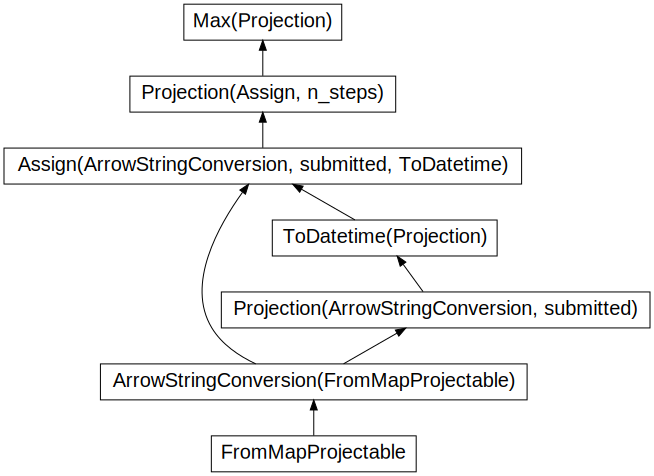

In [14]:
max_steps = recipes['n_steps'].max()

max_steps.visualize()

In [15]:
print(f"Максимальное значение в столбце n_steps: {max_steps.compute()}")

Максимальное значение в столбце n_steps: 145.0


6. Посчитайте количество отзывов с группировкой по месяцам добавления отзыва в базу.

In [16]:
res6 = recipes.groupby(recipes.submitted.dt.month).id.count().compute()
res6

submitted
1     193363
2     173834
3     192389
4     186049
5     192487
6     184205
7     189337
8     187276
9     181081
10    187018
11    180974
12    183624
Name: id, dtype: int64

7. Считайте файлы из архива `reviews_full.zip` (__ЛР12__) в виде `dask.bag`. Пользуясь результатом лабораторной работы 12, рассчитайте среднее значение оценок отзывов с группировкой по месяцам. После завершения всех вычислений преобразуйте результат к `pd.Series`.

In [17]:
def my_loader(data) -> dict:

    json_str, path = data
    file_number = re.findall('reviews_([0-9]).json', path)

    if file_number is None or len(file_number) != 1:
        raise ValueError("Не могу извлечь номер файла")

    json_obj = json.loads(json_str)
    json_obj["rating"] = int(file_number[0])
    json_obj["date"] = datetime.strptime(json_obj["date"], '%Y-%m-%d')
    json_obj["month"] = json_obj["date"].month

    return json_obj

def mean(kv):
    
    key, value = kv
    ratings = [r for (_, r) in value]
    
    return key, sum(ratings) / len(ratings)

reviews = db.read_text(r'reviews_full\reviews_full\reviews_*.json', include_path=True).map(my_loader)

month_rating = reviews.map(lambda x: (x['month'], x['rating']))

avg_rating_by_months = month_rating.groupby(lambda x: x[0]).map(mean)

result = avg_rating_by_months.compute()
res7_series = pd.Series(map(lambda x: x[1], result), index=map(lambda x: x[0], result), name="mean_rating")


res7_series.index.name = 'month'
res7_series

month
8     4.410822
1     4.408553
5     4.415401
2     4.407135
11    4.408829
7     4.411717
3     4.406911
4     4.412259
10    4.411452
12    4.406908
6     4.418419
9     4.410661
Name: mean_rating, dtype: float64

8. Пользуясь результатами решения задач 6 и 7, создайте `pd.DataFrame`, содержащий два столбца: `mean_rating`, `recipes_count`

In [18]:
res6_series = pd.Series(res6, name="recipes_count")

res6_series.index.name = 'month'
res6_series

month
1     193363
2     173834
3     192389
4     186049
5     192487
6     184205
7     189337
8     187276
9     181081
10    187018
11    180974
12    183624
Name: recipes_count, dtype: int64

In [19]:
res8_df = pd.DataFrame([res7_series, res6_series]).T
res8_df

,mean_rating,recipes_count
month,,
8,4.410822,187276.0
1,4.408553,193363.0
5,4.415401,192487.0
2,4.407135,173834.0
11,4.408829,180974.0
7,4.411717,189337.0
3,4.406911,192389.0
4,4.412259,186049.0
10,4.411452,187018.0
